<a href="https://colab.research.google.com/github/edwardliu24/edwardliu24.github.io/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
from tensorflow.keras import utils 
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [4]:
# location of data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# download the data and extract it
path_to_zip = utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

# construct paths
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

# parameters for datasets
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# construct train and validation datasets 
train_dataset = utils.image_dataset_from_directory(train_dir,
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

validation_dataset = utils.image_dataset_from_directory(validation_dir,
                                                        shuffle=True,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMG_SIZE)

# construct the test dataset by taking every 5th observation out of the validation dataset
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

68616192/68606236 [==============================] - 0s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


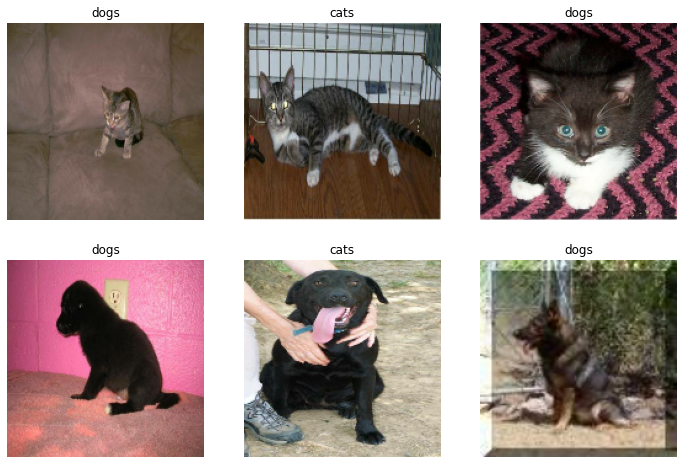

In [5]:
def dataset_visualiztion(dataset):
  class_names = dataset.class_names
  plt.figure(figsize=(12, 8))
  p = np.random.randint(1, 20)
  for images, labels in train_dataset.take(p):
    for i in range(6):
      ax = plt.subplot(2, 3, i + 1)
      if i <= 2:
        plt.imshow(images[labels==0][i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
      else:
        plt.imshow(images[labels==1][i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

dataset_visualiztion(train_dataset)


In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [7]:
labels_iterator= train_dataset.unbatch().map(lambda image, label: label).as_numpy_iterator()

In [8]:
cat_num = 0
dog_num = 0
for i in labels_iterator:
  if i == 0:
    cat_num += 1
  elif i == 1: 
    dog_num += 1

cat_num,dog_num

(1000, 1000)

In [11]:
model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46208)             0         
                                                                 
 dropout (Dropout)           (None, 46208)             0

In [15]:
model1.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model1.fit(train_dataset, 
            epochs=20, 
            validation_data=validation_dataset)

Epoch 1/20
63/63 [==============================] - 60s 939ms/step - loss: 22.4219 - accuracy: 0.5445 - val_loss: 0.7062 - val_accuracy: 0.5495
Epoch 2/20
63/63 [==============================] - 62s 978ms/step - loss: 0.6152 - accuracy: 0.6725 - val_loss: 0.7202 - val_accuracy: 0.5817
Epoch 3/20
63/63 [==============================] - 57s 903ms/step - loss: 0.5222 - accuracy: 0.7385 - val_loss: 0.7809 - val_accuracy: 0.5965
Epoch 4/20
63/63 [==============================] - 58s 913ms/step - loss: 0.4083 - accuracy: 0.8005 - val_loss: 0.8236 - val_accuracy: 0.5990
Epoch 5/20
63/63 [==============================] - 57s 905ms/step - loss: 0.3309 - accuracy: 0.8455 - val_loss: 0.8950 - val_accuracy: 0.6101
Epoch 6/20
63/63 [==============================] - 57s 902ms/step - loss: 0.2610 - accuracy: 0.9000 - val_loss: 0.9968 - val_accuracy: 0.5804
Epoch 7/20
63/63 [==============================] - 57s 901ms/step - loss: 0.2453 - accuracy: 0.8990 - val_loss: 1.2754 - val_accuracy: 0.606

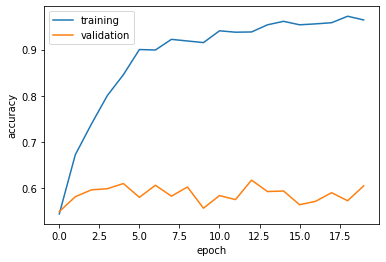

In [16]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

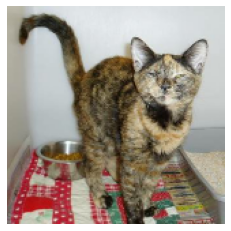

In [18]:
for images,labels in train_dataset.take(1):
  example = images[1]
  plt.imshow(example.numpy().astype("uint8"))
  plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

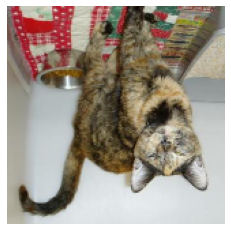

In [22]:
flip = layers.RandomFlip()
example_flipped = flip(example,training = True)
plt.imshow(example_flipped.numpy().astype("uint8"))
plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

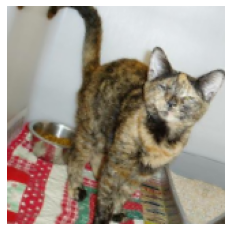

In [25]:
rotate1 = layers.RandomRotation(0.1)
example_rotated1 = rotate1(example, training = True)
plt.imshow(example_rotated1.numpy().astype("uint8"))
plt.axis("off")

(-0.5, 159.5, 159.5, -0.5)

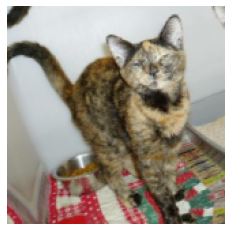

In [27]:
rotate2 = layers.RandomRotation(0.2)
example_rotated2 = rotate1(example, training = True)
plt.imshow(example_rotated2.numpy().astype("uint8"))
plt.axis("off")

In [28]:
model2 = keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.1),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Dense(64),
    layers.Flatten(),
    layers.Dense(2)
])

In [29]:
model2.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history2 = model2.fit(train_dataset,
                   epochs=20,
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 80s 1s/step - loss: 24.7660 - accuracy: 0.5510 - val_loss: 1.0638 - val_accuracy: 0.5743
Epoch 2/20
63/63 [==============================] - 78s 1s/step - loss: 0.8080 - accuracy: 0.5470 - val_loss: 0.7201 - val_accuracy: 0.5297
Epoch 3/20
63/63 [==============================] - 86s 1s/step - loss: 0.6920 - accuracy: 0.5430 - val_loss: 0.7065 - val_accuracy: 0.5334
Epoch 4/20
63/63 [==============================] - 70s 1s/step - loss: 0.7054 - accuracy: 0.4900 - val_loss: 0.6986 - val_accuracy: 0.5161
Epoch 5/20
63/63 [==============================] - 70s 1s/step - loss: 0.6929 - accuracy: 0.5160 - val_loss: 0.6915 - val_accuracy: 0.5210
Epoch 6/20
63/63 [==============================] - 71s 1s/step - loss: 0.6888 - accuracy: 0.5320 - val_loss: 0.6880 - val_accuracy: 0.5545
Epoch 7/20
63/63 [==============================] - 71s 1s/step - loss: 0.6807 - accuracy: 0.5455 - val_loss: 0.6961 - val_accuracy: 0.5347
Epoch 8/20
63/63 [=

In [ ]:
plt.plot(history2.history["accuracy"], label = "training")
plt.plot(history2.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [30]:
i = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(i)
preprocessor = tf.keras.Model(inputs = [i], outputs = [x])

In [31]:
model3 = keras.Sequential([                       
    preprocessor,       

    layers.RandomFlip(),
    layers.RandomRotation(0.2),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.AveragePooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(2)
    ])

In [32]:
model3.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history3 = model3.fit(train_dataset,
                   epochs=20,
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 76s 1s/step - loss: 0.6963 - accuracy: 0.5085 - val_loss: 0.6973 - val_accuracy: 0.5532
Epoch 2/20
63/63 [==============================] - 75s 1s/step - loss: 0.6846 - accuracy: 0.5345 - val_loss: 0.6425 - val_accuracy: 0.6015
Epoch 3/20
63/63 [==============================] - 75s 1s/step - loss: 0.6643 - accuracy: 0.5790 - val_loss: 0.6344 - val_accuracy: 0.6312
Epoch 4/20
63/63 [==============================] - 75s 1s/step - loss: 0.6518 - accuracy: 0.5960 - val_loss: 0.6393 - val_accuracy: 0.6163
Epoch 5/20
63/63 [==============================] - 75s 1s/step - loss: 0.6238 - accuracy: 0.6365 - val_loss: 0.6401 - val_accuracy: 0.5965
Epoch 6/20
63/63 [==============================] - 75s 1s/step - loss: 0.6205 - accuracy: 0.6500 - val_loss: 0.6038 - val_accuracy: 0.6720
Epoch 7/20
63/63 [==============================] - 74s 1s/step - loss: 0.5837 - accuracy: 0.6905 - val_loss: 0.5764 - val_accuracy: 0.6980
Epoch 8/20
63/63 [==

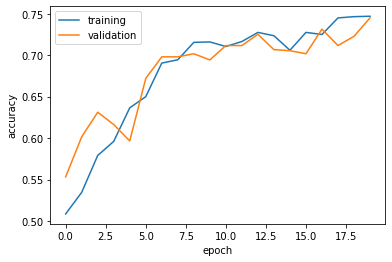

In [33]:
plt.plot(history3.history["accuracy"], label = "training")
plt.plot(history3.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [34]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

i = tf.keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = tf.keras.Model(inputs = [i], outputs = [x])

9420800/9406464 [==============================] - 0s 0us/step


In [35]:
model4 = keras.Sequential([
    preprocessor,       

    layers.RandomFlip(),
    layers.RandomRotation(0.2),

    base_model_layer,

    layers.GlobalMaxPooling2D(),
    layers.Dropout(0.2),
    layers.Dense(2)
    ])

In [36]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 160, 160, 3)       0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 160, 160, 3)       0         
                                                                 
 random_rotation_7 (RandomRo  (None, 160, 160, 3)      0         
 tation)                                                         
                                                                 
 model_1 (Functional)        (None, 5, 5, 1280)        2257984   
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 1280)             

In [37]:
model4.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history4 = model4.fit(train_dataset,
                   epochs=20, # how many rounds of training to do
                   validation_data = validation_dataset
)

Epoch 1/20
63/63 [==============================] - 58s 865ms/step - loss: 1.0451 - accuracy: 0.7515 - val_loss: 0.2072 - val_accuracy: 0.9418
Epoch 2/20
63/63 [==============================] - 54s 848ms/step - loss: 0.5213 - accuracy: 0.8665 - val_loss: 0.1362 - val_accuracy: 0.9554
Epoch 3/20
63/63 [==============================] - 53s 841ms/step - loss: 0.5031 - accuracy: 0.8700 - val_loss: 0.1289 - val_accuracy: 0.9653
Epoch 4/20
63/63 [==============================] - 50s 792ms/step - loss: 0.5094 - accuracy: 0.8735 - val_loss: 0.1206 - val_accuracy: 0.9592
Epoch 5/20
63/63 [==============================] - 51s 814ms/step - loss: 0.4797 - accuracy: 0.8765 - val_loss: 0.1052 - val_accuracy: 0.9715
Epoch 6/20
63/63 [==============================] - 51s 811ms/step - loss: 0.3981 - accuracy: 0.8950 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 7/20
63/63 [==============================] - 58s 913ms/step - loss: 0.3916 - accuracy: 0.8980 - val_loss: 0.1013 - val_accuracy: 0.9703

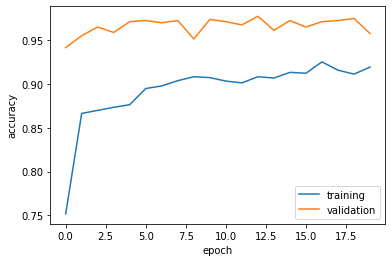

In [38]:
plt.plot(history4.history["accuracy"], label = "training")
plt.plot(history4.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

In [39]:
model4.evaluate(test_dataset)

6/6 [==============================] - 4s 561ms/step - loss: 0.0745 - accuracy: 0.9531


[0.07447778433561325, 0.953125]